## Getting into the "checkout" dataset

# 1 - Analyzing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
checkout_1 = pd.read_csv('checkout_1.csv')
checkout_2 = pd.read_csv('checkout_2.csv')

# Display the first few rows of each file to understand their structure
checkout_1.head(), checkout_2.head()

(  time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
 0  00h      9         12                  11           6.42            4.85
 1  01h      3          5                   1           1.85            1.92
 2  02h      1          0                   0           0.28            0.82
 3  03h      1          0                   0           0.42            0.46
 4  04h      0          0                   1           0.42            0.21,
   time  today  yesterday  same_day_last_week  avg_last_week  avg_last_month
 0  00h      6          9                   5           5.00            4.92
 1  01h      3          3                   2           2.00            1.92
 2  02h      3          1                   2           0.42            0.75
 3  03h      0          1                   1           0.42            0.46
 4  04h      0          0                   0           0.14            0.21)

In [3]:
checkout_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_last_week       24 non-null     float64
 5   avg_last_month      24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB


In [4]:
checkout_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_last_week       24 non-null     float64
 5   avg_last_month      24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB


In [5]:
# Check for missing and null values
missing_values_1 = checkout_1.isnull().sum()
duplicates_1 = checkout_1.duplicated().sum()

missing_values_1, duplicates_1

(time                  0
 today                 0
 yesterday             0
 same_day_last_week    0
 avg_last_week         0
 avg_last_month        0
 dtype: int64,
 0)

In [6]:
missing_values_2 = checkout_2.isnull().sum()
duplicates_2 = checkout_2.duplicated().sum()

missing_values_2, duplicates_2

(time                  0
 today                 0
 yesterday             0
 same_day_last_week    0
 avg_last_week         0
 avg_last_month        0
 dtype: int64,
 0)

In [7]:
def plot_trends(df, dataset_label):
    plt.figure(figsize=(12, 6))
    plt.plot(df['time'], df['today'], label='Today', marker='o')
    plt.plot(df['time'], df['yesterday'], label='Yesterday', marker='o')
    plt.plot(df['time'], df['same_day_last_week'], label='Same Day Last Week', marker='o')
    plt.plot(df['time'], df['avg_last_week'], label='Avg Last Week', marker='o')
    plt.plot(df['time'], df['avg_last_month'], label='Avg Last Month', marker='o')
    plt.title(f'Trends in {dataset_label}')
    plt.xlabel('Time')
    plt.ylabel('Events Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

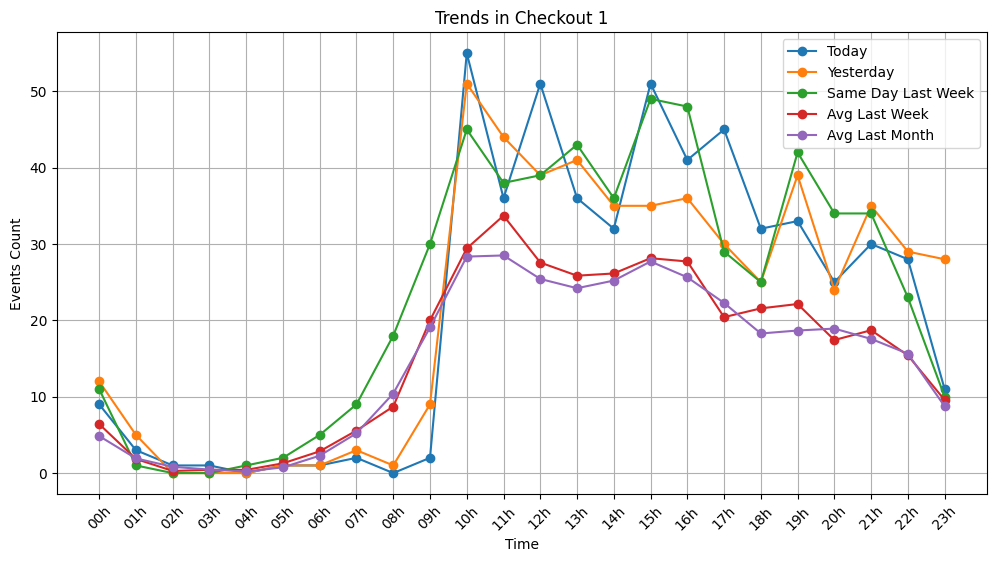

In [8]:
plot_trends(checkout_1, "Checkout 1")

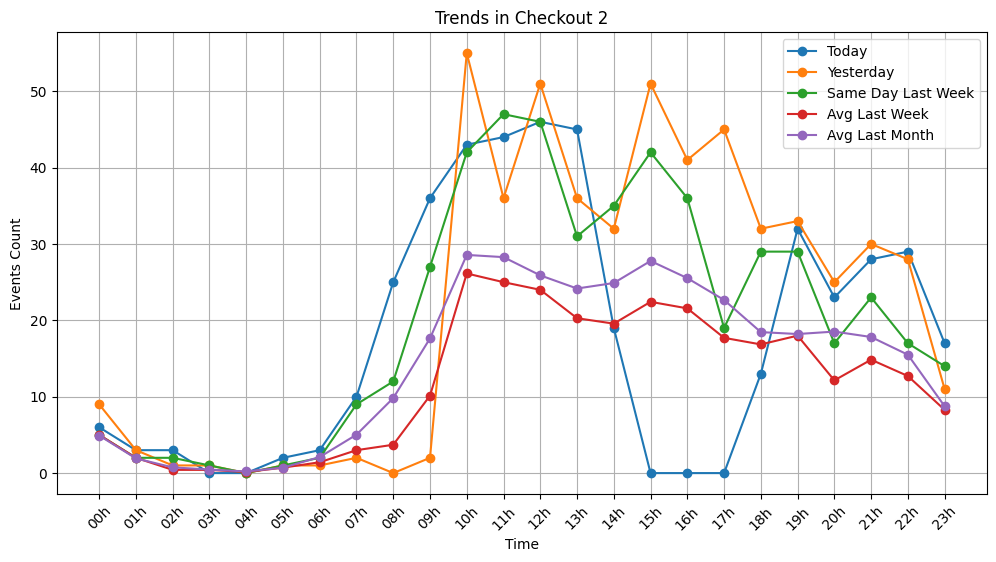

In [9]:
plot_trends(checkout_2, "Checkout 2")

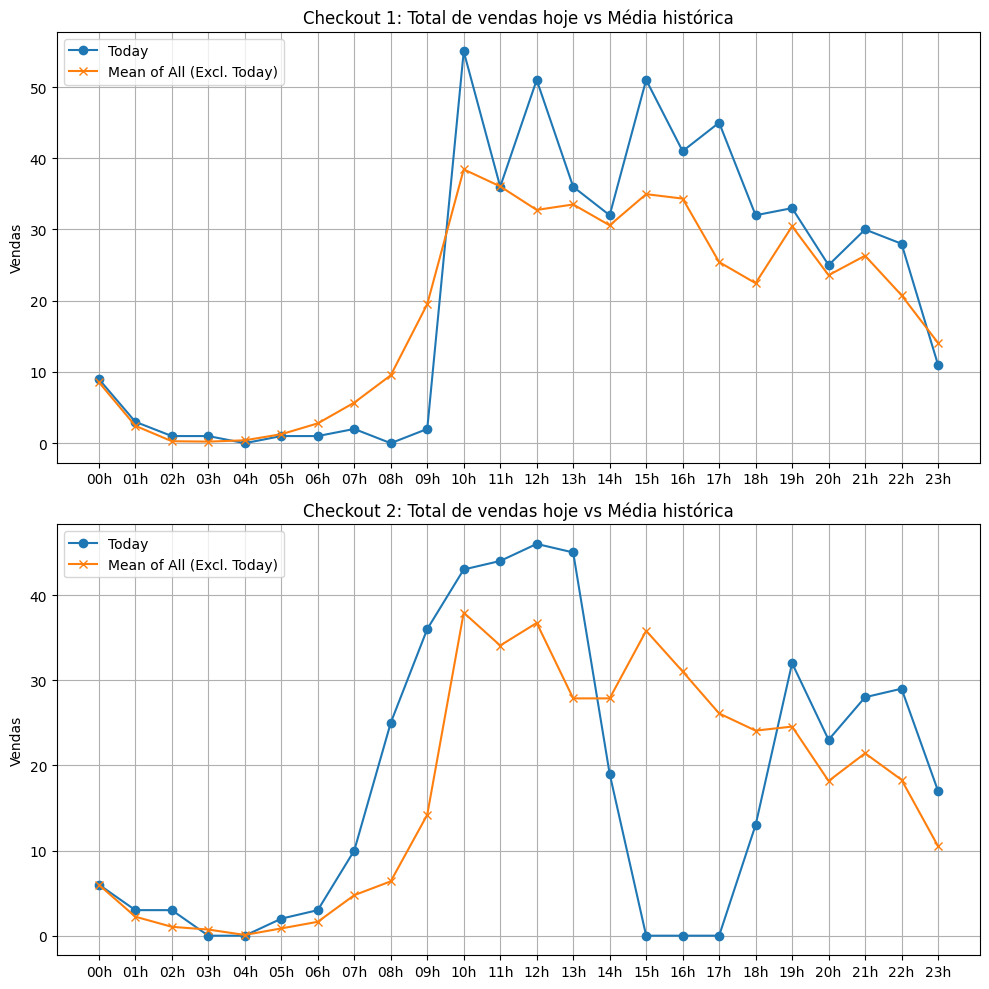

In [32]:
# Calculating the average of all variables except 'today'
checkout_1['mean_of_all'] = checkout_1[['yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].mean(axis=1)
checkout_2['mean_of_all'] = checkout_2[['yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].mean(axis=1)

# Plotting the graph to compare 'today' with the calculated average
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Chart for checkout_1
ax[0].plot(checkout_1['time'], checkout_1['today'], label='Today', marker='o')
ax[0].plot(checkout_1['time'], checkout_1['mean_of_all'], label='Mean of All (Excl. Today)', marker='x')
ax[0].set_title('Checkout 1: Total de vendas hoje vs Média histórica')
ax[0].set_ylabel('Vendas')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Chart for checkout_2
ax[1].plot(checkout_2['time'], checkout_2['today'], label='Today', marker='o')
ax[1].plot(checkout_2['time'], checkout_2['mean_of_all'], label='Mean of All (Excl. Today)', marker='x')
ax[1].set_title('Checkout 2: Total de vendas hoje vs Média histórica')
ax[1].set_ylabel('Vendas')
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()
